In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [3]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [4]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [5]:
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [6]:
dependent=dataset[['charges']]
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

      age     bmi  children  sex_male  smoker_yes
1163   18  28.215         0         0           0
196    39  32.800         0         0           0
438    52  46.750         5         0           0
183    44  26.410         0         0           0
1298   33  27.455         2         1           0
...   ...     ...       ...       ...         ...
763    27  26.030         0         1           0
835    42  35.970         2         1           0
1216   40  25.080         0         1           0
559    19  35.530         0         1           0
684    33  18.500         1         0           0

[936 rows x 5 columns]
          charges
1163   2200.83085
196    5649.71500
438   12592.53450
183    7419.47790
1298   5261.46945
...           ...
763    3070.80870
835    7160.33030
1216   5415.66120
559    1646.42970
684    4766.02200

[936 rows x 1 columns]
      age     bmi  children  sex_male  smoker_yes
578    52  30.200         1         1           0
610    47  29.370         1         

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train
X_test

array([[ 0.89459283, -0.08863026, -0.06746417,  1.02378711, -0.50466988],
       [ 0.53757957, -0.22180837, -0.06746417, -0.97676557, -0.50466988],
       [ 0.60898222,  1.57449152,  0.76341038,  1.02378711,  1.98149332],
       ...,
       [ 1.10880078,  1.20785059, -0.89833872,  1.02378711, -0.50466988],
       [ 1.75142463,  1.34905148, -0.06746417,  1.02378711, -0.50466988],
       [ 1.60861933, -0.92299913, -0.89833872, -0.97676557, -0.50466988]])

In [16]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='absolute_error',max_features='log2',splitter='best')
regressor=regressor.fit(X_train,Y_train)

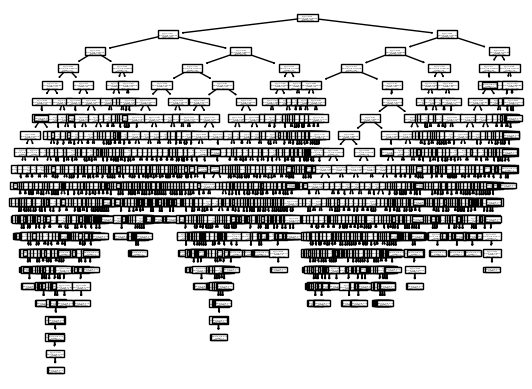

In [10]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [11]:
Y_predict=regressor.predict(X_test)
Y_predict

array([ 9141.99335 ,  8930.93455 , 46151.1245  , 13143.86485 ,
        9264.797   , 21984.47061 ,  1615.7667  , 10381.4787  ,
        7281.5056  ,  5253.524   ,  7228.21565 ,  9715.841   ,
        7345.7266  ,  8017.06115 , 18246.4955  ,  9414.92    ,
       12142.5786  ,  3292.52985 ,  7512.267   , 33307.5508  ,
       24869.8368  , 11881.9696  ,  9625.92    , 37829.7242  ,
        1826.843   ,  4076.497   ,  2483.736   ,  8538.28845 ,
        3757.8448  ,  9141.99335 ,  7954.517   , 47896.79135 ,
       12981.3457  ,  9144.565   , 18033.9679  ,  3554.203   ,
        9141.99335 , 37133.8982  , 39836.519   , 11482.63485 ,
       13725.47184 ,  2866.091   , 21082.16    , 43813.8661  ,
       36307.7983  ,  3579.8287  ,  9414.92    ,  6272.4772  ,
        4719.52405 , 11830.6072  ,  2020.5523  ,  2331.519   ,
       37829.7242  , 44641.1974  , 11856.4115  , 19673.33573 ,
        1826.843   ,  8782.469   , 10096.97    , 12913.9924  ,
        1252.407   , 28868.6639  , 14590.63205 ,  9141.

In [17]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,Y_predict)
r2

0.7163338685685292